# Лабораторная работа 2 (Задача кластеризация)

Цель: научится применять модели кластеризации библиотеки scikit-learn к набору эмпирических данных

Дано: excel-файл

Результат: число кластеров, обученная модель

Ход выполнения: 
1. Загрузить данные из файла (использовать библиотеку Pandas).
2. Визуализировать загруженные данные (диаграмма рассеяния).
3. Оценить число групп (кластеров).
4. Выбрать модель кластеризации.
5. Обучить модель кластеризации на обучающих данных.
6. Проверить качество полученной модели на тестовых данных.
7. Визуализировать результат.


1. Загрузить данные из файла (использовать библиотеку Pandas).


In [1]:
import pandas as pd
import sklearn as sk
import sklearn.model_selection
from sklearn import cluster
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sklearn.metrics
from functools import partial

f = '../../../tasks/lab2/dataset/lab2-01.xlsx'

data = pd.read_excel(f, names=['x', 'y'])
print(data)

            x         y
0    6.966738  9.136125
1    6.792361 -4.791980
2    5.849622 -5.671065
3   -9.331613  8.760587
4   -4.114449  0.441761
..        ...       ...
995 -1.165393 -7.446273
996  8.539903  7.340292
997  7.599335  7.441597
998  0.608204 -5.939335
999  8.069827  7.213899

[1000 rows x 2 columns]


2. Визуализировать загруженные данные (диаграмма рассеяния).

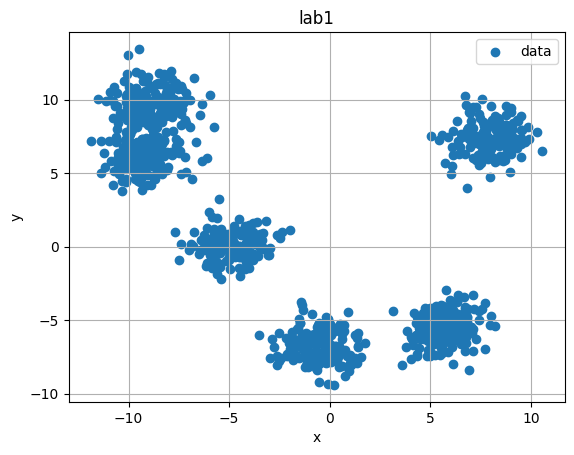

In [2]:
plt.scatter(data.x, data.y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('lab1')
plt.grid(True)
plt.show()

3. Оценить число групп (кластеров).
5

4. Выбрать модель кластеризации.

In [3]:
df = data
data = data.to_numpy()
data_tr, data_t = sk.model_selection.train_test_split(
    data, test_size=0.3, random_state=0)
model = cluster.KMeans(n_clusters=5, random_state=0)

5. Обучить модель кластеризации на обучающих данных.

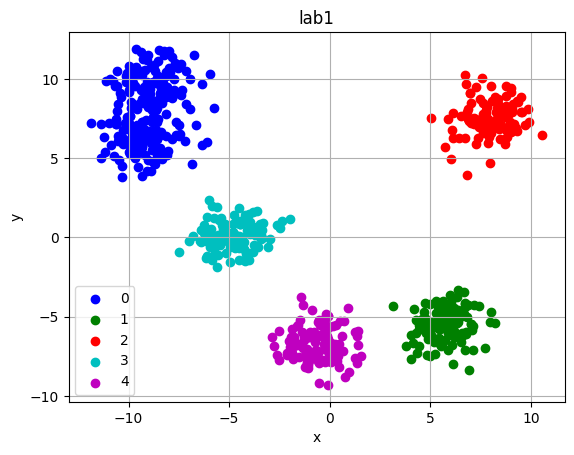

In [4]:
model.fit(data_tr)
def plot_labels(data):
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('lab1')
    plt.grid(True)
    df = data.copy()
    pred = model.predict(df.to_numpy())

    df.insert(0, 'pred', pred)
    for color, val in zip(mcolors.BASE_COLORS, sorted(df.pred.unique())):
        cur = df.loc[df.pred == val].drop(['pred'], axis=1).to_numpy()
        plt.scatter(cur[:, 0], cur[:, 1], label=val, color=color)
    plt.legend()
    plt.show()


plot_labels(pd.DataFrame(data_tr))

6. Проверить качество полученной модели на тестовых данных.

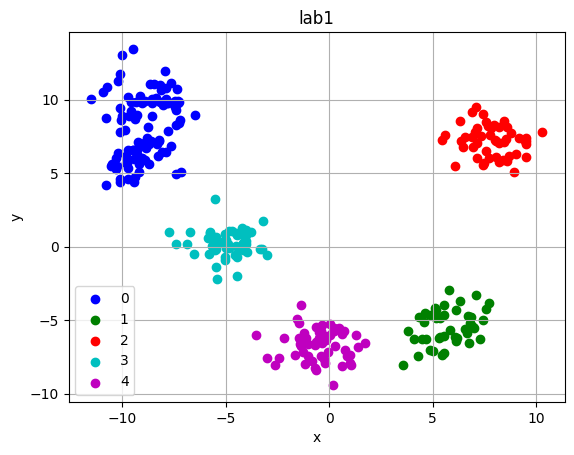

metrics.silhouette_score (-1 bad : 1 good) 0.7202085352064952
davies_bouldin_score (lower means better) 0.3696898814769102
calinski_harabasz_score (bigger - better) 1790.2878216070933


In [5]:
plot_labels(pd.DataFrame(data_t))
for metric, mssg in [
        (partial(sklearn.metrics.silhouette_score, random_state=0),
         'metrics.silhouette_score (-1 bad : 1 good)'),
        (sklearn.metrics.davies_bouldin_score,
         'davies_bouldin_score (lower means better)'),
        (sklearn.metrics.calinski_harabasz_score,
         'calinski_harabasz_score (bigger - better)'),
]:
    print(mssg, metric(data_t, model.predict(data_t)))

7. Визуализировать результат.

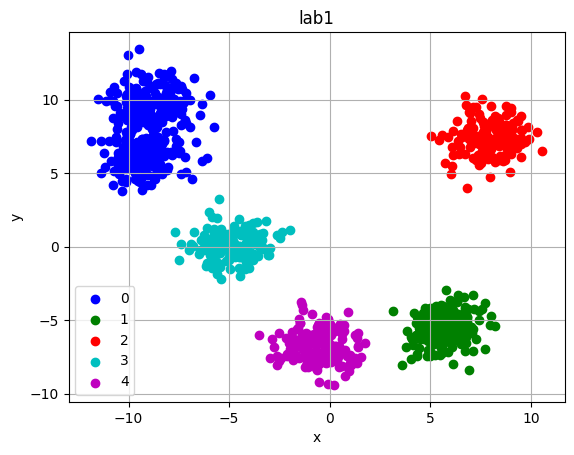

In [6]:
plot_labels(df)